In [3]:
#import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf

import IPython
import functools
import matplotlib.pyplot as plt
import numpy as np

# Download and import the MIT package
!pip install mitdeeplearning
import mitdeeplearning as mdl


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Get the training data: both images from CelebA and ImageNet
path_to_training_data = tf.keras.utils.get_file('train_face.h5','https://www.dropbox.com/s/hlz8atheyozp1yx/train_face.h5?dl=1')
loader = mdl.lab2.TrainingDatasetLoader(path_to_training_data)

1263889489/1263889489 [==============================] - 17s 0us/step
Opening /root/.keras/datasets/train_face.h5
Loading data into memory...


In [5]:
number_of_training_examples = loader.get_train_size()
(images, labels) = loader.get_batch(100)

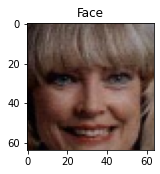

In [8]:
### Examining the CeleA training dataset ###

face_images = images[np.where(labels==1)[0]]
not_face_images = images[np.where(labels==0)[0]]

idx_face = 23
idx_not_face = 9

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(face_images[idx_face])
plt.title("Face");
plt.grid(False)

In [15]:
### Define the CNN Model

n_filters = 12       # base number of convolutional filters

def make_standard_classifier(n_outputs=1):
  Conv2D = functools.partial(tf.keras.layers.Conv2D, padding='same', activation='relu')
  BatchNormalization = tf.keras.layers.BatchNormalization
  Flatten = tf.keras.layers.Flatten
  Dense = functools.partial(tf.keras.layers.Dense, activation='relu')

  model = tf.keras.Sequential([
      Conv2D(filters=1*n_filters, kernel_size=5, strides=2),
      BatchNormalization(),

      Conv2D(filters=2*n_filters, kernel_size=3, strides=2),
      BatchNormalization(),

      Conv2D(filters=4*n_filters, kernel_size=3, strides=2),
      BatchNormalization(),

      Conv2D(filters=6*n_filters, kernel_size=3, strides=2),
      BatchNormalization(),

      Flatten(),
      Dense(512),
      Dense(n_outputs, activation=None)

  ])

  return model

standard_classifier = make_standard_classifier()

In [ ]:
### Train the standard CNN ###

# training hyperparameter
batch_size =32
num_epoches =2
learning_rate = 5e-4

optimizer = tf.keras.optimizers.Adam(learning_rate)     ## Define our optimizer
loss_history = mdl.util.LossHistory(smoothing_factor=0.99)
plotter = mdl.util.PeriodicPlotter(sec=2, scale='semilogy')

if hasattr(tqdm, '_instances'): tqdm._instances.clear()  ## clear if it exists
